# Recreating the 2D Numerical Example from the WarpPINN Paper  

In this notebook, we will recreate the 2D numerical example from the WarpPINN paper. The example is a simple image registration problem where the template image is a sinusoidal image and the reference image is a deformed version of the template image. The goal is to recover the deformation field that maps the reference image to the template image.  

We will need the following information from the paper: 


"A region of the reference image corresponding to a ring of thickness $R_2 - R_1$ is deformed into another ring centered at the same point but with thickness $r_2 - r_1$, that is  

$R_2^2 - R_1^2 = r_2^2 - r_1^2$   

We propose a radial deformation of the form  

$\varphi(X, Y) = f(\sqrt(X^2 + Y^2)) (X, Y)^T$       

$ f(R) \begin{cases} 
      r_1 / R_1 \ \text{if} \ R < R_1 \\  
      \frac{1}{R}\sqrt{R^2 - R_1^2 + r_1^2} \ \text{if} \ R_1 \leq R \leq R_2 \\  
        r_2 / R_2 \ \text{if} \ R > R_2
   \end{cases}$  

where $R = \sqrt(X^2 + Y^2)$. The domain of the reference image is taken as the unit square $\Omega_0 = [0, 1] \times [0, 1]$, then, this radial transformation is done from the point $(0.5, 0.5)$ by considering $\varphi(X - 0.5, Y - 0.5)$.    


The domain in the reference image is taken as the unit square $\Omega_0 = [0, 1] \times [0, 1]$, then, this radial transformation is done from the point $(0.5, 0.5)$
by just considering \phi(X - 0.5, Y - 0.5). The intensity of the template image is defined as: 
$T(x, y) = \sin(4 \pi x) \cos(4 \pi y)$,  
while the reference image is simply constructed as  
$R(X, Y) = T(\phi(X, Y))$."  

Note: I believe there is a mistake in the formulation of the template image, as the images shown in the WarpPINN paper match $\sin(8 \pi x) \cos(8 \pi y)$. Also, the number of voxels is not 

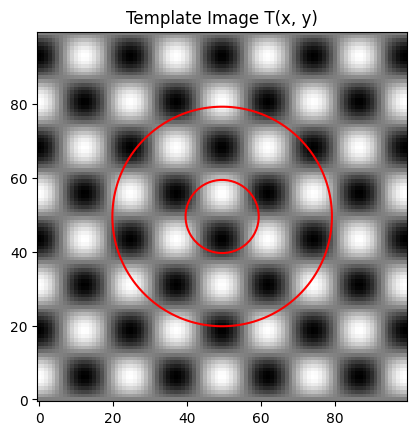

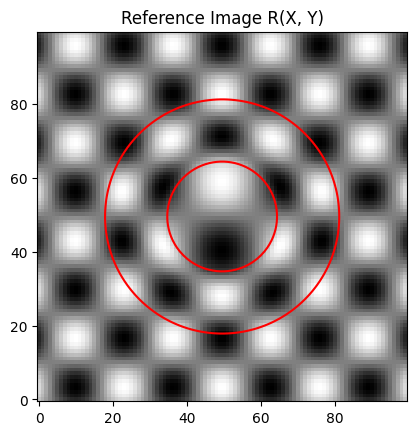

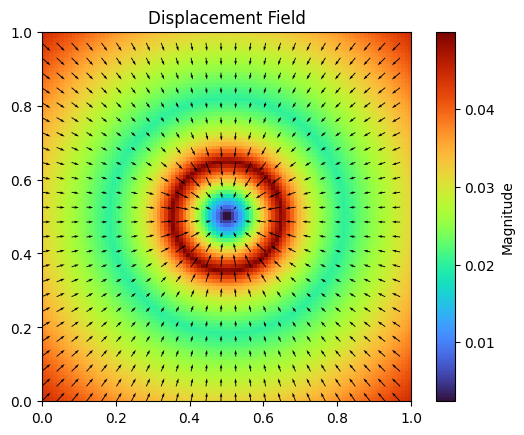

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
R1, R2 = 0.15, 0.32
r1, r2 = 0.1, 0.3

# Define the radial deformation function
def f(R):
    if R < R1:
        return r1 / R1
    elif R1 <= R <= R2:
        return np.sqrt(R**2 - R1**2 + r1**2) / R
    else:
        return r2 / R2

# Define the intensity function T(x, y)
def T(x, y):
    return np.sin(8 * np.pi * x) * np.cos(8 * np.pi * y)

# Create the reference image domain
Y, X = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100), indexing='xy')

# Apply the radial transformation
X_shifted = X - 0.5
Y_shifted = Y - 0.5
R = np.sqrt(X_shifted**2 + Y_shifted**2)
phi_X = np.vectorize(f)(R) * X_shifted 
phi_Y = np.vectorize(f)(R) * Y_shifted 

# Construct the reference image R(X, Y)
R_image = T(phi_X, phi_Y)

# Plot the template image T(x, y)  
plt.imshow(T(X, Y), origin='lower', cmap='gray')    
plt.contour(R, levels=[r1, r2], colors='red')
plt.title('Template Image T(x, y)') 
plt.show()

# Plot the reference image
plt.imshow(R_image, origin='lower', cmap='gray') 
plt.contour(R, levels=[R1, R2], colors='red')
plt.title('Reference Image R(X, Y)')
plt.show() 

# Plot the magnitude and displacement field corresponding to the radial transformation  
from matplotlib.colors import LogNorm
ux = phi_X - X_shifted
uy = phi_Y - Y_shifted
n_sample_pts = 4  
plt.quiver(X[::n_sample_pts, ::n_sample_pts], 
           Y[::n_sample_pts, ::n_sample_pts], 
           ux[::n_sample_pts, ::n_sample_pts], 
           uy[::n_sample_pts, ::n_sample_pts], color='black')
plt.title('Displacement Field') 
plt.imshow(np.sqrt(ux**2 + uy**2), origin='lower', extent=(0, 1, 0, 1), cmap='turbo')
plt.colorbar().set_label('Magnitude')
plt.show()

# Setting up the Problem 